In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from monks_data_loader import load_monk_data
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import lightgbm as lgb
import seaborn as sns
import pandas as pd
import numpy as np

In [11]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(4, 3))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False
    )
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [12]:
def run_lightgbm(monk_dataset_id):
    X_train, y_train, X_test, y_test = load_monk_data(monk_dataset_id)

    print(f"Monk dataset id: {monk_dataset_id}")

    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'num_leaves': [10, 20, 30],
        'learning_rate': [0.05, 0.1, 0.2],
        'min_child_samples': [5, 10],
        'data_sample_strategy': ['goss'],
        'enable_bundle': [True]
    }

    # cross validation with 3 splits
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    # lightgbm classifier initialization
    base_clf = lgb.LGBMClassifier(
        random_state=42,
        verbose=-1,
        force_col_wise=True
    )

    random_search_cv = RandomizedSearchCV(
        estimator=base_clf,
        param_distributions=param_grid,
        n_iter=20,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1,
        random_state=42,
        return_train_score=False 
    )
    
    random_search_cv.fit(X_train, y_train)

    print(f"Best params: {random_search_cv.best_params_}")
    print(f"Best cross validation accuracy: {random_search_cv.best_score_:.4f}")

    # extract best model 
    best_model = random_search_cv.best_estimator_
    
    y_train_results = best_model.predict(X_train)
    y_test_results = best_model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_results)
    test_acc = accuracy_score(y_test, y_test_results)
    gap = train_acc - test_acc

    print(f"TR Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy:     {test_acc:.4f}")
    print(f"Gap (Train-Test):  {gap:.4f}")
    print(f"CV Mean:           {random_search_cv.best_score_:.4f}")
    
    plot_confusion_matrix(
        y_test,
        y_test_results,
        title=f"MONK {monk_dataset_id} Confusion Matrix (Best Model)"
    )

Run ligthgbm on each monk dataset

Monk dataset id: 1
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'num_leaves': 30, 'n_estimators': 100, 'min_child_samples': 5, 'max_depth': 5, 'learning_rate': 0.2, 'enable_bundle': True, 'data_sample_strategy': 'goss'}
Best cross validation accuracy: 0.8959
TR Accuracy: 1.0000
Test Accuracy:     1.0000
Gap (Train-Test):  0.0000
CV Mean:           0.8959


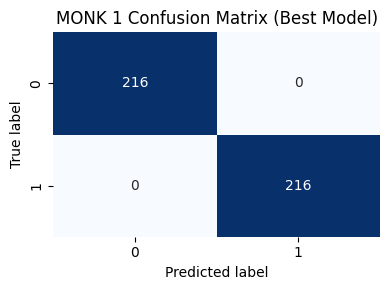

In [13]:
run_lightgbm(1)

Monk dataset id: 2
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'num_leaves': 30, 'n_estimators': 200, 'min_child_samples': 5, 'max_depth': 7, 'learning_rate': 0.1, 'enable_bundle': True, 'data_sample_strategy': 'goss'}
Best cross validation accuracy: 0.6623
TR Accuracy: 1.0000
Test Accuracy:     0.7778
Gap (Train-Test):  0.2222
CV Mean:           0.6623


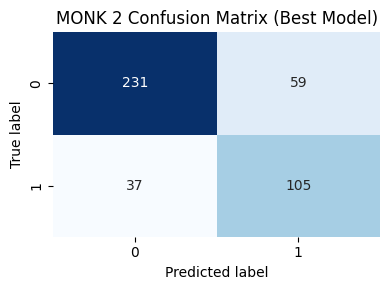

In [14]:
run_lightgbm(2)

Monk dataset id: 3
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'num_leaves': 30, 'n_estimators': 50, 'min_child_samples': 10, 'max_depth': 5, 'learning_rate': 0.05, 'enable_bundle': True, 'data_sample_strategy': 'goss'}
Best cross validation accuracy: 0.9343
TR Accuracy: 0.9344
Test Accuracy:     0.9722
Gap (Train-Test):  -0.0378
CV Mean:           0.9343


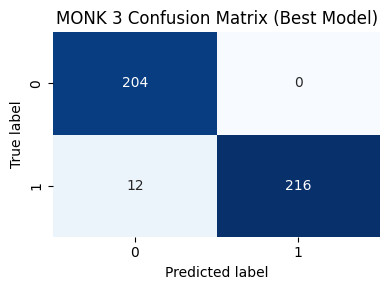

In [15]:
run_lightgbm(3)